# 전국 어린이집 표준데이터
* https://www.data.go.kr/dataset/3035522/fileData.do

In [0]:
# 추가 설치 
!pip install plotnine
!pip install folium

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import pandas as pd
import numpy as np
from plotnine import *
import re
from plotnine import *




In [0]:
%pwd
#참고 : 서버 명령어 기재시 % 입력 후 서버 명령어 활용

'/content'

In [0]:
# 로컬 파일 업로드 
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 전국어린이집표준데이터.csv to 전국어린이집표준데이터.csv
User uploaded file "전국어린이집표준데이터.csv" with length 6986572 bytes


In [0]:
%ls -alrt

total 23428
drwxr-xr-x 2 root root     4096 Aug 15 20:56 sample_data/
lrwxrwxrwx 1 root root        8 Aug 15 20:56 datalab -> /content/
drwxr-xr-x 1 root root     4096 Aug 20 19:36 ../
drwxr-xr-x 4 root root     4096 Aug 20 19:37 .forever/
drwx------ 3 root root     4096 Aug 20 19:37 .local/
drwxr-xr-x 5 root root     4096 Aug 21 02:12 .ipython/
drwxr-xr-x 1 root root     4096 Aug 21 02:12 .config/
drwx------ 4 root root     4096 Aug 21 02:12 .cache/
-rw-r--r-- 1 root root 16964608 Aug 21 04:42 전국어린이집표준데이터.xls
drwxr-xr-x 1 root root     4096 Aug 21 04:43 ./
-rw-r--r-- 1 root root  6986572 Aug 21 04:44 전국어린이집표준데이터.csv


In [219]:
pre_sale = pd.read_csv('전국어린이집표준데이터.csv', encoding='euc-kr')
pre_sale.shape

(43429, 18)

In [220]:
pre_sale.head(3)
#참고 : 머리 - 윗 부분 자료 검색

,어린이집명,시도명,시군구명,어린이집유형구분,정원수,보육교직원수,소재지도로명주소,어린이집전화번호,어린이집팩스번호,보육실수,놀이터수,CCTV설치수,통학차량운영여부,홈페이지주소,데이터기준일자,위도,경도,Unnamed: 17
0,e-편한세상2단지어린이집,울산광역시,동구,민간,35,9.0,울산광역시 동구 봉수로 290 e-편한세상2단지어린이집(전하동),052-234-2273,052-234-2274,4,0,5,Y,http://www.childcare.go.kr,2018-01-01,35.512506,129.423556,NaN
1,e-편한세상어린이집,울산광역시,동구,민간,43,9.0,울산광역시 동구 봉수로 290 e-편한세상 관리동 어린이집(전하동),052-233-6711,052-233-6711,5,0,5,N,http://www.childcare.go.kr,2018-01-01,35.512506,129.423556,NaN
2,i예담어린이집,울산광역시,동구,민간,59,11.0,울산광역시 동구 월봉1길 26 (방어동),052-201-5857,052-201-5857,8,2,12,Y,http://www.childcare.go.kr,2018-01-01,35.488844,129.419293,NaN


In [221]:
pre_sale.tail(10)
#참고: 꼬리 - 뒷 부분 자료 검색

,어린이집명,시도명,시군구명,어린이집유형구분,정원수,보육교직원수,소재지도로명주소,어린이집전화번호,어린이집팩스번호,보육실수,놀이터수,CCTV설치수,통학차량운영여부,홈페이지주소,데이터기준일자,위도,경도,Unnamed: 17
43419,초롱별어린이집,인천광역시,부평구,가정,13,3.0,"인천광역시 부평구 경인로1118번길 67 110동 101호(일신동, 일신주공아파트)",032-504-4606,NaN,3,0,4,N,NaN,2017-01-17,37.482139,126.742909,NaN
43420,친구사랑어린이집,인천광역시,부평구,가정,20,5.0,"인천광역시 부평구 부평문화로 37 10동 104호(부평동, 동아1차아파트)",032-523-9605,NaN,3,0,4,N,NaN,2017-01-17,37.492770,126.719081,NaN
43421,커가는꿈나무어린이집,인천광역시,부평구,민간,37,12.0,인천광역시 부평구 부흥북로35번길 14 (부평동),032-506-4799,NaN,5,0,6,N,NaN,2017-01-17,37.501956,126.726153,NaN
43422,코람데오어린이집,인천광역시,부평구,가정,20,6.0,"인천광역시 부평구 체육관로 57 601동 101호(삼산동, 삼산타운6단지)",032-277-1035,NaN,3,0,4,Y,NaN,2017-01-17,37.508692,126.737670,NaN
43423,코코어린이집,인천광역시,부평구,가정,13,3.0,"인천광역시 부평구 부개로 11 505동 102호(부개동, 부개주공5단지아파트)",032-330-9647,NaN,3,0,4,N,NaN,2017-01-17,37.499394,126.737567,NaN
43424,크니크니어린이집,인천광역시,부평구,가정,14,3.0,"인천광역시 부평구 굴포로 81 101동 101호(갈산동, 주공1단지아파트)",032-264-6004,NaN,2,0,3,N,NaN,2017-01-17,37.511968,126.730904,NaN
43425,큰나무어린이집,인천광역시,부평구,가정,20,5.0,"인천광역시 부평구 안남로 272 101동 101호 (청천동, 금호아파트)",070-8887-0053,NaN,3,0,4,N,NaN,2017-01-17,37.506564,126.710723,NaN
43426,큰별아이어린이집,인천광역시,부평구,민간,93,14.0,인천광역시 부평구 안남로253번길 44 (4층 건물전체) (산곡동),032-330-1500,NaN,6,1,11,Y,NaN,2017-01-17,37.506155,126.706757,NaN
43427,큰별어린이집,인천광역시,부평구,가정,13,6.0,"인천광역시 부평구 길주남로 143 109동 101호(부개동, 부개주공1단지아파트)",032-361-5146,NaN,3,0,4,N,NaN,2017-01-17,37.505259,126.738012,NaN
43428,큰빛어린이집,인천광역시,부평구,민간,46,9.0,인천광역시 부평구 길주남로102번길 11-9 (2층 건물전체) (부평동),032-361-3020,NaN,6,0,8,Y,NaN,2017-01-17,37.503598,126.733562,NaN


In [222]:
# 분양가격이 숫자 타입이 아닙니다. 숫자 타입으로 변경해줄 필요가 있겠어요.
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43429 entries, 0 to 43428
Data columns (total 18 columns):
어린이집명          43429 non-null object
시도명            43429 non-null object
시군구명           43429 non-null object
어린이집유형구분       43429 non-null object
정원수            43429 non-null int64
보육교직원수         41378 non-null float64
소재지도로명주소       43429 non-null object
어린이집전화번호       43424 non-null object
어린이집팩스번호       19669 non-null object
보육실수           30141 non-null object
놀이터수           25156 non-null object
CCTV설치수        30772 non-null object
통학차량운영여부       34371 non-null object
홈페이지주소         5220 non-null object
데이터기준일자        43429 non-null object
위도             31789 non-null float64
경도             31789 non-null float64
Unnamed: 17    0 non-null float64
dtypes: float64(4), int64(1), object(13)
memory usage: 6.0+ MB


In [223]:
pre_sale_clean = pre_sale.drop(columns=['어린이집팩스번호','어린이집전화번호','시군구명','보육실수','놀이터수','홈페이지주소','어린이집팩스번호','CCTV설치수','데이터기준일자','통학차량운영여부','Unnamed: 17'])


#pre_sale_clean2 = pre_sale_clean.drop(columns=[7] , axis= 1)


pre_sale_clean.info()
pre_sale_clean.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43429 entries, 0 to 43428
Data columns (total 8 columns):
어린이집명       43429 non-null object
시도명         43429 non-null object
어린이집유형구분    43429 non-null object
정원수         43429 non-null int64
보육교직원수      41378 non-null float64
소재지도로명주소    43429 non-null object
위도          31789 non-null float64
경도          31789 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.7+ MB


Index(['어린이집명', '시도명', '어린이집유형구분', '정원수', '보육교직원수', '소재지도로명주소', '위도', '경도'], dtype='object')

In [224]:
pre_sale_clean.head()

,어린이집명,시도명,어린이집유형구분,정원수,보육교직원수,소재지도로명주소,위도,경도
0,e-편한세상2단지어린이집,울산광역시,민간,35,9.0,울산광역시 동구 봉수로 290 e-편한세상2단지어린이집(전하동),35.512506,129.423556
1,e-편한세상어린이집,울산광역시,민간,43,9.0,울산광역시 동구 봉수로 290 e-편한세상 관리동 어린이집(전하동),35.512506,129.423556
2,i예담어린이집,울산광역시,민간,59,11.0,울산광역시 동구 월봉1길 26 (방어동),35.488844,129.419293
3,THE자람어린이집,울산광역시,민간,41,8.0,울산광역시 동구 월봉7길 28(화정동),35.492059,129.419641
4,가온어린이집,울산광역시,가정,19,5.0,"울산광역시 동구 바드래길 110 101동 101호(전하동, 대경넥스빌아파트)",35.517116,129.426247


In [225]:
pre_sale_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43429 entries, 0 to 43428
Data columns (total 8 columns):
어린이집명       43429 non-null object
시도명         43429 non-null object
어린이집유형구분    43429 non-null object
정원수         43429 non-null int64
보육교직원수      41378 non-null float64
소재지도로명주소    43429 non-null object
위도          31789 non-null float64
경도          31789 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.7+ MB


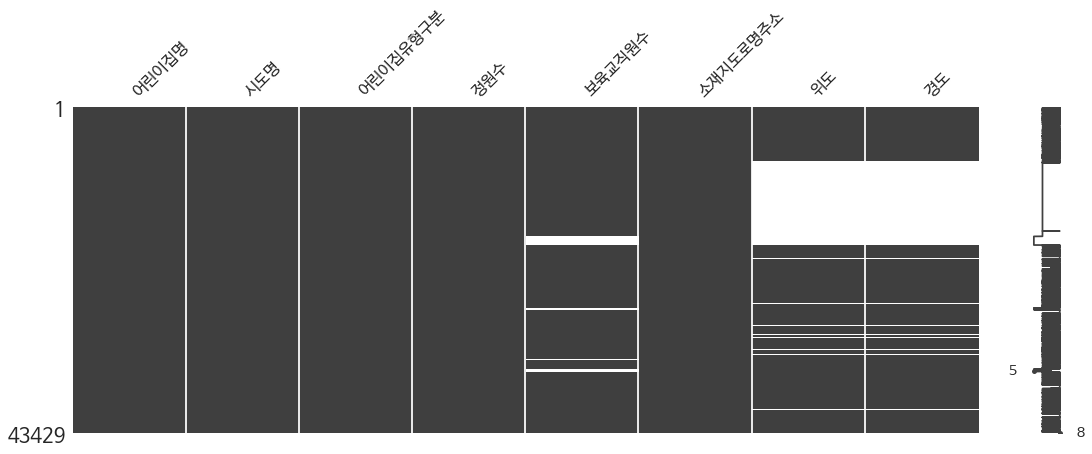

In [226]:
import  missingno  as msno

msno.matrix(pre_sale_clean, figsize=(18,6))

In [227]:
pre_sale_clean.columns

Index(['어린이집명', '시도명', '어린이집유형구분', '정원수', '보육교직원수', '소재지도로명주소', '위도', '경도'], dtype='object')

In [0]:

#한글 

#!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

from plotnine import *
import plotnine

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

In [228]:
pre_sale_clean.isnull().sum()

어린이집명           0
시도명             0
어린이집유형구분        0
정원수             0
보육교직원수       2051
소재지도로명주소        0
위도          11640
경도          11640
dtype: int64

In [229]:
pre_sale_clean.describe()


,정원수,보육교직원수,위도,경도
count,43429.000000,41378.000000,31789.000000,31789.000000
mean,43.395266,7.874595,36.134339,127.770968
std,39.931992,5.035621,1.032709,0.936334
min,0.000000,0.000000,33.214438,124.663775
25%,19.000000,5.000000,35.229622,126.948985
50%,20.000000,6.000000,35.873497,127.402924
75%,53.000000,10.000000,37.372355,128.689469
max,489.000000,71.000000,38.495819,130.908834


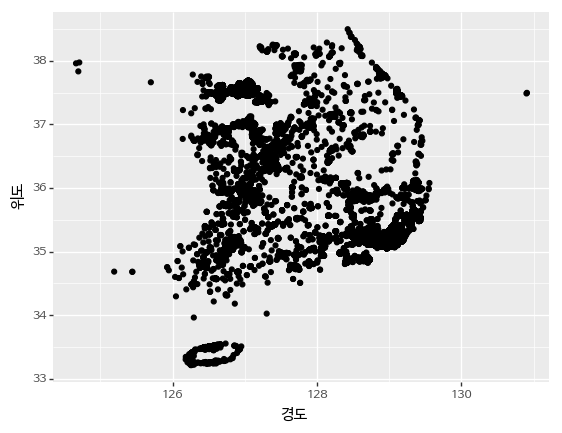

<ggplot: (8778597225080)>

In [230]:
(ggplot(pre_sale_clean)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [0]:
pre_sale_clean_seoul = pre_sale_clean.loc[pre_sale_clean['시도명'] == '서울특별시']

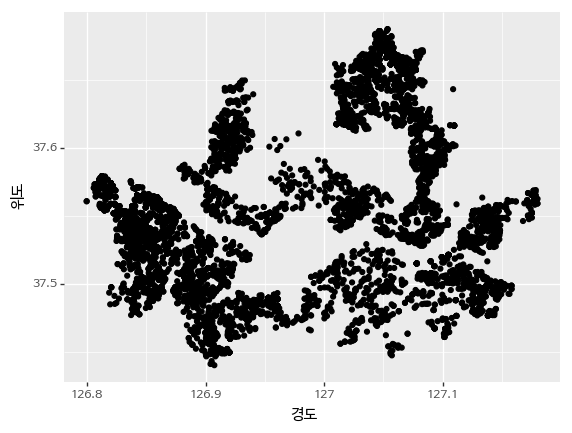

<ggplot: (-9223363258257703182)>

In [232]:
(ggplot(pre_sale_clean_seoul)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

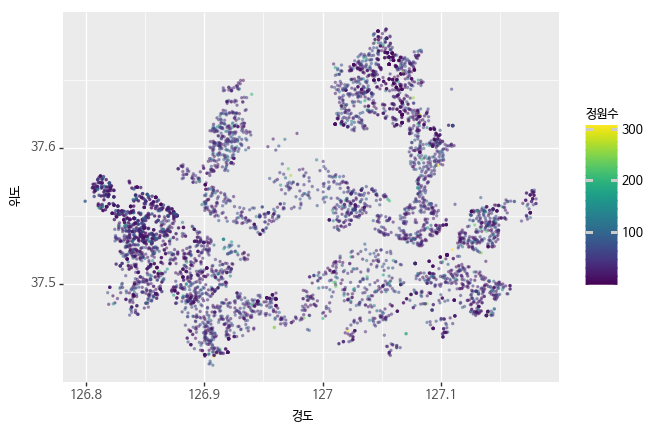

<ggplot: (8778597058557)>

In [233]:
(ggplot(pre_sale_clean_seoul )
 + aes(x='경도', y='위도', color='정원수')
 + geom_point(alpha=0.4, size=0.4)
 + theme(text=element_text(fontproperties=font))
 + scale_fill_gradient(low = 'green', high = 'red') 
)

In [234]:
pre_sale_clean_seoul.shape

(5636, 8)

In [235]:
pre_sale_clean_seoul.head(100)

,어린이집명,시도명,어린이집유형구분,정원수,보육교직원수,소재지도로명주소,위도,경도
430,가연어린이집,서울특별시,가정,18,4.0,"서울특별시 은평구 통일로 780 9동 106호(불광동, 미성아파트)",37.615827,126.928566
431,곤지곤지어린이집,서울특별시,가정,17,3.0,서울특별시 은평구 연서로3길 31-11 101호,37.602024,126.912336
432,기린어린이집,서울특별시,가정,19,7.0,"서울특별시 은평구 불광로 208 101동 107호(불광동,북한산대창센시티)",37.625411,126.929803
433,기쁨어린이집,서울특별시,가정,19,4.0,"서울특별시 은평구 가좌로 344 111동 102호(신사동, 현대2차아파트)",37.597919,126.907467
434,리틀 초콜릿어린이집,서울특별시,가정,19,5.0,서울특별시 강서구 양천로30길 108 101-112,NaN,NaN
698,해달별어린이집,서울특별시,가정,20,6.0,서울특별시 강서구 방화대로6가길 6,37.554717,126.816838
712,자연어린이집,서울특별시,가정,18,5.0,서울특별시 은평구 불광로5길 6-17,37.615274,126.931892
850,명성 어린이집,서울특별시,민간,57,10.0,서울특별시 강서구 등촌로13길 76 (화곡동),37.536688,126.859913
851,마곡자연숲어린이집,서울특별시,민간,37,8.0,서울특별시 강서구 수명로1길 110 마곡수명산파크3단지 303,37.551857,126.824707
852,마곡아이숲어린이집,서울특별시,가정,19,5.0,"서울특별시 강서구 마곡중앙로 36 1503동 105호(발산1동, 마곡엠밸리15단지)",37.557317,126.827302


In [238]:
pre_sale_clean_seoul['시도'] = pre_sale_clean_seoul['소재지도로명주소'].str.split(' ', expand=True)[0]
pre_sale_clean_seoul['구군'] = pre_sale_clean_seoul['소재지도로명주소'].str.split(' ', expand=True)[1]
print(pre_sale_clean_seoul.shape)
pre_sale_clean_seoul.columns

pre_sale_clean_seoul.head()

(5636, 10)


,어린이집명,시도명,어린이집유형구분,정원수,보육교직원수,소재지도로명주소,위도,경도,시도,구군
430,가연어린이집,서울특별시,가정,18,4.0,"서울특별시 은평구 통일로 780 9동 106호(불광동, 미성아파트)",37.615827,126.928566,서울특별시,은평구
431,곤지곤지어린이집,서울특별시,가정,17,3.0,서울특별시 은평구 연서로3길 31-11 101호,37.602024,126.912336,서울특별시,은평구
432,기린어린이집,서울특별시,가정,19,7.0,"서울특별시 은평구 불광로 208 101동 107호(불광동,북한산대창센시티)",37.625411,126.929803,서울특별시,은평구
433,기쁨어린이집,서울특별시,가정,19,4.0,"서울특별시 은평구 가좌로 344 111동 102호(신사동, 현대2차아파트)",37.597919,126.907467,서울특별시,은평구
434,리틀 초콜릿어린이집,서울특별시,가정,19,5.0,서울특별시 강서구 양천로30길 108 101-112,NaN,NaN,서울특별시,강서구


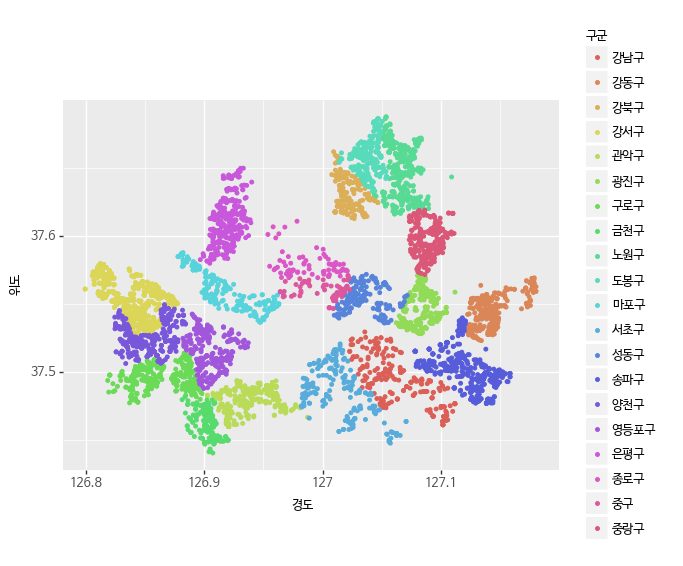

<ggplot: (8778600251519)>

In [241]:
(ggplot(pre_sale_clean_seoul)
 + aes(x='경도', y='위도', color='구군')
 + geom_point(alpha=1, size=1)
 + theme(text=element_text(fontproperties=font))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

In [0]:
pre_sale_clean_seoul_unique = pre_sale_clean_seoul['구군'].unique()

In [248]:

pre_sale_clean_seoul_gu = pre_sale_clean_seoul['구군'].value_counts().reset_index()

pre_sale_clean_seoul_gu_count = pre_sale_clean_seoul_gu.shape[0]

pre_sale_clean_seoul_gu.columns = ['구군', '합계']

pre_sale_clean_seoul_gu = pre_sale_clean_seoul_gu.sort_values(by='합계', ascending=False)



# 누락된 구를 찾기 위해 데이터프레임에 들어있는 구군을 추출한다.
pre_sale_clean_seoul_gu_unique = pre_sale_clean_seoul_gu['구군'].unique()

print('아래 데이터를 보니 몇개 구가 누락된것을 알 수 있다. 전체 {}개 구 중 {}개 구만 있다.'.format(len(gu), pre_sale_clean_seoul_gu_count))

exclude_gu = [g for g in gu if not g in pre_sale_clean_seoul_gu_unique] 

print('누락된 구: {}'.format(exclude_gu))

error_gu = [g for g in pre_sale_clean_seoul_gu_unique if not g in gu] 

print('잘못들어간 구: {}'.format(error_gu))


pre_sale_clean_seoul_gu



아래 데이터를 보니 몇개 구가 누락된것을 알 수 있다. 전체 25개 구 중 20개 구만 있다.
누락된 구: ['동대문구', '동작구', '서대문구', '성북구', '용산구']
잘못들어간 구: []


,구군,합계
0,강서구,874
1,노원구,478
2,송파구,421
3,구로구,346
4,양천구,333
5,은평구,294
6,강동구,286
7,관악구,280
8,영등포구,266
10,중랑구,255


In [252]:
pre_sale_clean_seoul_gu.head()

,구군,합계
0,강서구,874
1,노원구,478
2,송파구,421
3,구로구,346
4,양천구,333


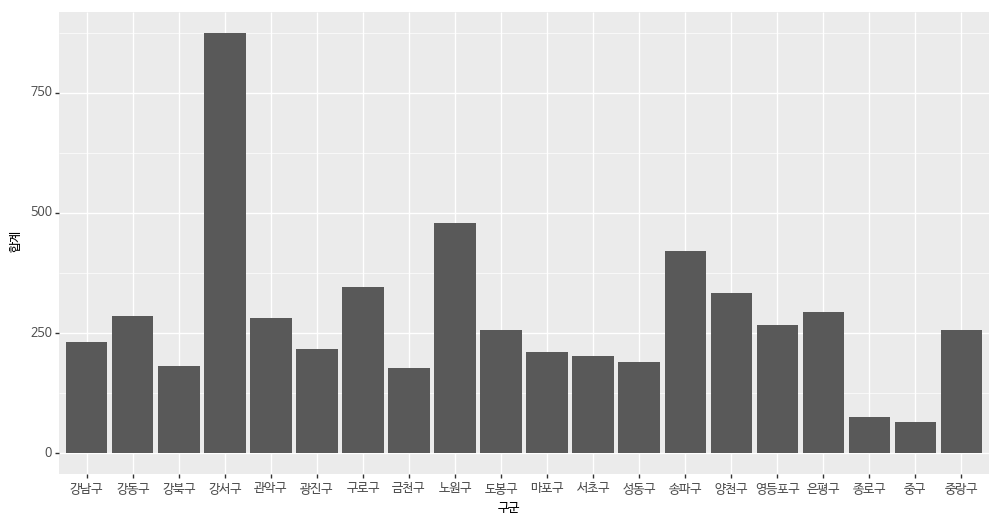

<ggplot: (-9223363258255084039)>

In [258]:
(ggplot(pre_sale_clean_seoul_gu, aes(x='구군', y='합계'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(fontproperties=font),
         figure_size=(12, 6))
)

In [282]:
#pre_sale_clean_seoul.loc['구군'].count()


pre_sale_clean_seoul_gangsu_gu = pre_sale_clean_seoul.loc[pre_sale_clean_seoul['구군'] == '강서구']

pre_sale_clean_seoul_gangsu_gu.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 874 entries, 434 to 2022
Data columns (total 10 columns):
어린이집명       874 non-null object
시도명         874 non-null object
어린이집유형구분    874 non-null object
정원수         874 non-null int64
보육교직원수      874 non-null float64
소재지도로명주소    874 non-null object
위도          836 non-null float64
경도          836 non-null float64
시도          874 non-null object
구군          874 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 75.1+ KB


In [266]:
pre_sale_clean_seoul.tail()

,어린이집명,시도명,어린이집유형구분,정원수,보육교직원수,소재지도로명주소,위도,경도,시도,구군
42658,미소담은어린이집,서울특별시,가정,20,6.0,"서울특별시 서초구 바우뫼로 89 105동 105호(양재동, 우성아파트)",37.474356,127.031179,서울특별시,서초구
42659,바로미어린이집,서울특별시,직장,230,37.0,서울특별시 서초구 서초중앙로 157 서울법원종합청사별관 (서초동),37.498276,127.011123,서울특별시,서초구
42660,바름이어린이집,서울특별시,협동,49,12.0,서울특별시 서초구 서초대로45길 20 서울변호사교육문화관 1층 (서초동),37.494146,127.008965,서울특별시,서초구
42661,반포1동어린이집,서울특별시,국공립,120,20.0,서울특별시 서초구 신반포로 318 (반포동),37.509999,127.018481,서울특별시,서초구
42662,반포복지관어린이집,서울특별시,국공립,54,7.0,서울특별시 서초구 사평대로55길 90 (반포동),37.507883,127.021259,서울특별시,서초구
